<a href="https://colab.research.google.com/github/achmadbadri/UjiCoba/blob/main/Final_Code_4_18_2021_Dengan_Aktivasi_Relu_dan_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/walking-through-support-vector-regression-and-lstms-with-stock-price-prediction-45e11b620650

In [1]:
import keras
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import pandas as pd 
import pandas_datareader.data as web
import datetime
import numpy as np 
from matplotlib import style
from google.colab import files
# Visualize the training stock data:
import matplotlib.pyplot as plt
%matplotlib inline

# ignore warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Get the stock data using yahoo API:
style.use('ggplot')

# get 2014-2018 data to train our model
start = datetime.datetime(2014,1,1)
end = datetime.datetime(2018,12,31)
df = web.DataReader("BBRI.JK", 'yahoo', start, end) 

# get 2019 data to test our model on 
start = datetime.datetime(2018,11,13)
end = datetime.datetime(2019,12,31)
test_df = web.DataReader("BBRI.JK", 'yahoo', start, end) 
print(df.shape)
print(test_df.shape)

(1251, 6)
(292, 6)


In [3]:
# Create train set of adj close prices data:
train_data = df.loc[:,'Adj Close'].to_numpy()
print(train_data.shape) # 1258 


# Apply normalization before feeding to LSTM using sklearn:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)

scaler.fit(train_data)
train_data = scaler.transform(train_data)

(1251,)


In [4]:
'''Function to create a dataset to feed into an LSTM'''
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
    
    
# Create the data to train our model on:
time_steps = 36
X_train, y_train = create_dataset(train_data, time_steps)

# reshape it [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 36, 1))

print(X_train.shape)


# Visualizing our data with prints: 
print('X_train:')
print(str(scaler.inverse_transform(X_train[0])))
print("\n")
print('y_train: ' + str(scaler.inverse_transform(y_train[0].reshape(-1,1)))+'\n')

(1215, 36, 1)
X_train:
[[1151.86120605]
 [1143.97180176]
 [1108.46899414]
 [1116.35864258]
 [1132.13745117]
 [1155.80578613]
 [1199.19787598]
 [1321.48461914]
 [1337.26342773]
 [1278.09240723]
 [1313.59509277]
 [1293.87145996]
 [1313.59509277]
 [1325.42919922]
 [1372.76611328]
 [1325.42919922]
 [1301.76074219]
 [1289.92663574]
 [1309.65026855]
 [1313.59509277]
 [1309.65026855]
 [1305.70556641]
 [1313.59509277]
 [1325.42919922]
 [1376.71069336]
 [1372.76611328]
 [1388.54516602]
 [1368.82116699]
 [1372.76611328]
 [1376.71069336]
 [1412.21325684]
 [1420.1027832 ]
 [1479.27368164]
 [1506.88671875]
 [1522.66577148]
 [1522.66577148]]


y_train: [[1487.16320801]]



In [5]:
# Build the model 
model = keras.Sequential()

model.add(LSTM(units = 128, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 64, return_sequences = False))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units = 32, activation='relu'))
model.add(Dense(units = 16,  activation='relu'))
model.add(Dense(units = 1, activation= 'linear'))
# Compiling the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the model to the Training set
history = model.fit(X_train, y_train, epochs = 20, batch_size = 10, validation_split=.30)

Epoch 1/20
85/85 [==============================] - 7s 52ms/step - loss: 0.0199 - mean_absolute_error: 0.0956 - val_loss: 0.0025 - val_mean_absolute_error: 0.0373
Epoch 2/20
85/85 [==============================] - 3s 38ms/step - loss: 0.0018 - mean_absolute_error: 0.0329 - val_loss: 0.0027 - val_mean_absolute_error: 0.0411
Epoch 3/20
85/85 [==============================] - 3s 39ms/step - loss: 0.0015 - mean_absolute_error: 0.0307 - val_loss: 0.0035 - val_mean_absolute_error: 0.0501
Epoch 4/20
85/85 [==============================] - 3s 38ms/step - loss: 0.0013 - mean_absolute_error: 0.0282 - val_loss: 0.0024 - val_mean_absolute_error: 0.0393
Epoch 5/20
85/85 [==============================] - 3s 39ms/step - loss: 0.0012 - mean_absolute_error: 0.0273 - val_loss: 0.0031 - val_mean_absolute_error: 0.0438
Epoch 6/20
85/85 [==============================] - 3s 39ms/step - loss: 0.0013 - mean_absolute_error: 0.0277 - val_loss: 0.0048 - val_mean_absolute_error: 0.0619
Epoch 7/20
85/85 [====

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 36, 128)           66560     
_________________________________________________________________
dropout (Dropout)            (None, 36, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1

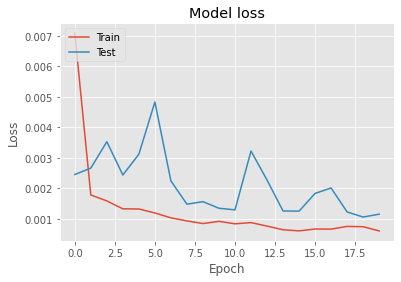

In [7]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [8]:
# Get the stock prices for 2019 to have our model make the predictions
test_data = test_df['Adj Close'].values
test_data = test_data.reshape(-1,1)
test_data = scaler.transform(test_data)

# Create the data to test our model on:
time_steps = 36
X_test, y_test = create_dataset(test_data, time_steps)

# store the original vals for plotting the predictions 
y_test = y_test.reshape(-1,1)
true = y_test
org_y = scaler.inverse_transform(y_test)

# reshape it [samples, time steps, features]
X_test = np.reshape(X_test, (X_test.shape[0], 36, 1))

# Predict the prices with the model
predicted_y = model.predict(X_test)
pred = predicted_y
predicted_y = scaler.inverse_transform(predicted_y)


In [11]:
# MSE
difference_array = np.subtract(true, pred)
squared_array = np.square(difference_array)
mse = squared_array.mean()
print("MSE :", mse)

# The RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("RMSE : %.2f" % mean_squared_error(true, pred, squared=False))

# The MAE
print("MAE : %.2f" % mean_absolute_error(true, pred))

#Mean Absolute Percentange Error
MAPE = (np.mean(np.abs((true - pred) / true))) * 100
print('MAPE : ', MAPE)

# Explained variance score: 1 is perfect prediction
from sklearn.metrics import r2_score
print('R2 score: %.2f' % r2_score(true, pred))

MSE : 0.0009446847004661613
RMSE : 0.03
MAE : 0.02
MAPE :  2.0501987200987766
R2 score: 0.91


We choose the mean square error MSE of all samples as our metric. It can be calculated through Eqn. (47) using test set. Notice that the MSE we calculated are derived from normalized data. That's because there exists huge value gap among dierent stocks. if we use original stock price to evaluate error, the error of high price stocks would probably be much more larger than low price ones, which implies models perform better on high price stocks would very likely to have better overall performance. Thus the performance on low price stocks would become dispensable. To avoid the bias caused by the aforementioned problem we evaluate the error with normalized stock price ranged from -1 to 1. (Li, H., Shen, Y., dan Zhu, Y. 2018. Stock Price Prediction Using attention-based Multi-Input LSTM)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

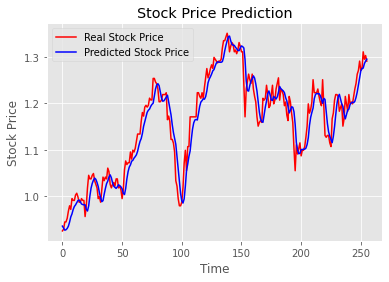

In [12]:
# plot the results 
plt.plot(true, color = 'red', label = 'Real Stock Price')
plt.plot(pred, color = 'blue', label = 'Predicted Stock Price')
#plt.plot(df['Adj Close'], color = 'black', label = 'Past Stock')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.savefig('Stock Price SVR LSTM 1.png')
files.download("Stock Price SVR LSTM 1.png")
plt.show()

In [13]:
predicted_y = pd.DataFrame(predicted_y)
org_y = pd.DataFrame(org_y)
describe = pd.DataFrame()
describe['True Price'] = org_y[0]
describe['Prediction'] = predicted_y[0]
describe['difference'] = org_y[0] - predicted_y[0]
describe['MAPE (%)'] = abs(describe['difference']/org_y[0]*100)
describe.describe()

,True Price,Prediction,difference,MAPE (%)
count,256.000000,256.000000,256.000000,256.000000
mean,3823.832823,3809.587646,14.244726,1.448442
std,245.579322,249.278824,70.746380,1.241757
min,3276.169189,3279.998291,-289.636230,0.006173
25%,3620.319885,3595.782043,-21.185852,0.577097
50%,3881.332764,3877.970337,22.126709,1.142489
75%,3994.107666,3972.822510,55.474854,1.944730
max,4276.044434,4261.743652,181.369141,7.516890


In [14]:
describe.head(10)

,True Price,Prediction,difference,MAPE (%)
0,3276.169189,3300.492188,-24.322998,0.742422
1,3285.244629,3290.740479,-5.495850,0.167289
2,3321.545654,3279.998291,41.547363,1.250844
3,3321.545654,3282.167480,39.378174,1.185538
4,3339.696533,3288.578613,51.117920,1.530616
5,3375.997314,3300.171631,75.825684,2.246023
6,3403.223145,3320.897705,82.325439,2.419043
7,3385.072510,3346.922363,38.150146,1.127011
8,3439.523926,3362.049072,77.474854,2.252488
9,3430.448975,3384.338379,46.110596,1.344156


In [33]:
a = np.array(describe['True Price'])
b = np.array(describe['Prediction'])

# MSE
difference_array = np.subtract(a, b)
squared_array = np.square(difference_array)
mse = squared_array.mean()
print("MSE :", mse)

# The RMSE
print("RMSE: %.2f" % mean_squared_error(a, b, squared=False))

# The MAE
print("MAE: %.2f" % mean_absolute_error(a, b))

#Mean Absolute Percentange Error
c = (np.mean(np.abs((a - b) / a))) * 100
print('MAPE : ', c)

# Explained variance score: 1 is perfect prediction
from sklearn.metrics import r2_score
print('R2 score: %.2f' % r2_score(a, b))



MSE : 5188.411579514388
RMSE: 72.03
MAE: 54.98
MAPE :  1.448441794876293
R2 score: 0.91


In [16]:
print(model.evaluate(X_train, y_train))
print(model.evaluate(X_test, y_test))

38/38 [==============================] - 1s 16ms/step - loss: 7.4243e-04 - mean_absolute_error: 0.0210
[0.0007424303330481052, 0.020971953868865967]
8/8 [==============================] - 1s 17ms/step - loss: 9.4468e-04 - mean_absolute_error: 0.0235
[0.0009446844924241304, 0.023461712524294853]


In [17]:
print(model.metrics_names)

['loss', 'mean_absolute_error']


In [18]:
graph  = test_df.drop(test_df.index[0:36])
graph.reset_index(inplace=True)
graph.rename(columns = {'index':'Date'})
graph = graph.drop(columns=['High','Low','Open','Volume','Close'])
graph['Predict_Value'] = predicted_y[0]
graph.head()
graph.set_index('Date', inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

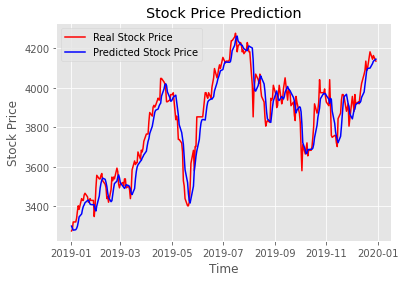

In [19]:
# plot the results 
plt.plot(graph['Adj Close'], color = 'red', label = 'Real Stock Price')
plt.plot(graph['Predict_Value'], color = 'blue', label = 'Predicted Stock Price')
#plt.plot(df['Adj Close'], color = 'black', label = 'Past Stock')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.savefig('Stock Price SVR LSTM 1.png')
files.download("Stock Price SVR LSTM 1.png")
plt.show()

In [20]:
final  = test_df.drop(test_df.index[0:36])
final.reset_index(inplace=True)
final.rename(columns = {'index':'Date'})
final = final.drop(columns=['High','Low','Open','Volume','Close'])
final['Predict_Value'] = predicted_y[0]
final['Selisih'] = final['Adj Close'] - final['Predict_Value']
final['Lost/Risk (%)'] = abs((final['Adj Close'] - final['Predict_Value'])/final['Predict_Value']*100)
final = final.drop(columns=['Adj Close'])

In [21]:
percent = test_df.drop(test_df.index[0:35])
percent = percent.drop(test_df.index[-1])
percent.reset_index(inplace=True)
percent.rename(columns = {'index':'Date'}) 
percent = percent.drop(columns=['High','Low','Open','Volume','Close'])
percent['Next Day'] = predicted_y
percent['Plus or Minus']= percent['Adj Close'] - percent['Next Day']
percent['Next Day (%)']= abs(((percent['Adj Close'] - percent['Next Day'])/percent['Adj Close'])*100)

In [22]:
True_Next_Day = test_df.drop(test_df.index[0:35])
True_Next_Day = True_Next_Day.drop(test_df.index[-1])
True_Next_Day.reset_index(inplace=True)
True_Next_Day.rename(columns = {'index':'Date'}) 
True_Next_Day = True_Next_Day.drop(columns=['High','Low','Open','Volume','Close'])
True_Next_Day['True Next Day'] = org_y
True_Next_Day['True Plus or Minus']= (True_Next_Day['Adj Close'] - True_Next_Day['True Next Day'])
True_Next_Day['True Next Day (%)']= abs(((True_Next_Day['Adj Close'] - True_Next_Day['True Next Day'])/True_Next_Day['Adj Close'])*100)
True_Next_Day = True_Next_Day.drop(columns=['Adj Close','True Next Day'])

In [23]:
Concating = percent.merge(final, how='outer', on='Date')
Concating = Concating.merge(True_Next_Day, how='outer', on='Date')
#Concating.set_index('Date', inplace=True)
Final_Predict = Concating.copy()
Final_Predict['Harga Saham Hari ini'] = Concating['Adj Close']
Final_Predict['Prediksi Besok'] = Concating['Plus or Minus']
Final_Predict['Harga Besok Sebenarnya'] = Concating['True Plus or Minus']
Final_Predict['Prediksi Besok (%)'] = (Concating['Next Day (%)'])
Final_Predict['Harga Besok Sebenarnya (%)'] = Concating['True Next Day (%)']
Final_Predict['Selisih Prediksi'] = (Final_Predict['Harga Besok Sebenarnya'] - Final_Predict['Prediksi Besok'])
Final_Predict['Risk/MAPE(%)'] = abs(((Final_Predict['Harga Besok Sebenarnya'] - Final_Predict['Prediksi Besok'])/Final_Predict['Harga Besok Sebenarnya'])*100)
Final_Predict['Risk/MAPE(%)'] = round(Final_Predict['Risk/MAPE(%)'], 2)
Final_Predict = Final_Predict.drop(columns=['Adj Close', 'Next Day', 'Plus or Minus', 'Next Day (%)',
                                            'Predict_Value', 'Selisih', 'Lost/Risk (%)', 'True Plus or Minus',
                                            'True Next Day (%)'])
Final_Predict = Final_Predict.replace(0, np.nan)
Final_Predict = Final_Predict.dropna()
Final_Predict.set_index('Date', inplace=True)
Final_Predict.shape

(226, 7)

In [24]:
Final_Predict.head()

,Harga Saham Hari ini,Prediksi Besok,Harga Besok Sebenarnya,Prediksi Besok (%),Harga Besok Sebenarnya (%),Selisih Prediksi,Risk/MAPE(%)
Date,,,,,,,
2019-01-01,3321.545654,21.053467,45.376465,0.633845,1.366125,24.322998,53.60
2019-01-02,3276.169189,-14.571289,-9.075439,0.444766,0.277014,5.495850,60.56
2019-01-03,3285.244629,5.246338,-36.301025,0.159694,1.104972,-41.547363,114.45
2019-01-07,3321.545654,32.967041,-18.150879,0.992521,0.546459,-51.117920,281.63
2019-01-08,3339.696533,39.524902,-36.300781,1.183488,1.086948,-75.825684,208.88


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

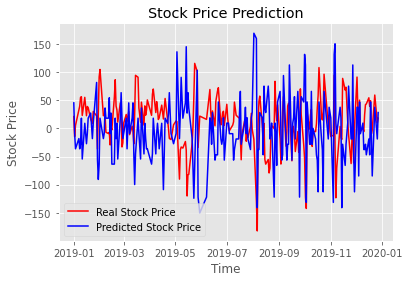

In [25]:
# plot the results 
plt.plot(Final_Predict['Prediksi Besok'], color = 'red', label = 'Real Stock Price')
plt.plot(Final_Predict['Harga Besok Sebenarnya'], color = 'blue', label = 'Predicted Stock Price')
#plt.plot(Final_Predict['Risk/MAPE(%)'], color = 'black', label = 'RISK/MAPE(%)')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.savefig('Stock Price SVR LSTM 1.png')
files.download("Stock Price SVR LSTM 1.png")
plt.show()

In [26]:
#### Mencari Data STAT MODEL

In [27]:
a = X_test
a = np.reshape(a, (-1, 36))
a = scaler.inverse_transform(a)
a = pd.DataFrame(a)

In [28]:
b = y_test
#b = np.reshape(b, (-1, 36))
b = scaler.inverse_transform(b)
b = pd.DataFrame(b)

In [29]:
#OLS Model
import statsmodels.api as sm
X = a
Y = b
X = sm.add_constant(X)
model_ols = sm.OLS(Y,X)
results = model_ols.fit()

In [30]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     141.8
Date:                Sun, 18 Apr 2021   Prob (F-statistic):          4.35e-132
Time:                        08:09:58   Log-Likelihood:                -1363.2
No. Observations:                 256   AIC:                             2800.
Df Residuals:                     219   BIC:                             2932.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.5356     56.001      1.867      0.063      -5.833     214.904
0             -0.0742      0.068     -1.090      0.277      -0.208       0.060
1              0.0719      0.097      0.739      0.461      -0.120       0.264
2              0.0766      0.097      0.787      0.432      -0.115       0.269
3              0.0318      0.098      0.326      0.745      -0.161       0.224
4             -0.2069      0.097     -2.142      0.033      -0.397      -0.017
5              0.0370      0.097      0.384      0.701      -0.153       0.227
6              0.1546      0.096      1.618      0.107      -0.034       0.343
7             -0.0423      0.096     -0.439      0.661      -0.232       0.148
8             -0.0557      0.097     -0.573      0.567      -0.247       0.136
9              0.1140      0.097      1.169      0.244      -0.078       0.306
10            -0.1374      0.097     -1.416      0.158      -0.329       0.054
11             0.0708      0.097      0.730      0.466      -0.120       0.262
12             0.0234      0.097      0.241      0.809      -0.168       0.215
13            -0.1009      0.097     -1.038      0.300      -0.293       0.091
14             0.0458      0.098      0.468      0.641      -0.147       0.239
15            -0.1200      0.098     -1.230      0.220      -0.312       0.072
16             0.1845      0.097      1.907      0.058      -0.006       0.375
17            -0.0776      0.097     -0.802      0.424      -0.268       0.113
18             0.1112      0.096      1.157      0.248      -0.078       0.301
19            -0.1222      0.096     -1.274      0.204      -0.311       0.067
20             0.1311      0.096      1.365      0.174      -0.058       0.320
21            -0.1195      0.096     -1.248      0.213      -0.308       0.069
22             0.0151      0.096      0.158      0.875      -0.174       0.204
23            -0.0699      0.096     -0.726      0.468      -0.259       0.120
24             0.0901      0.096      0.939      0.349      -0.099       0.279
25            -0.0245      0.096     -0.254      0.800      -0.214       0.165
26            -0.0084      0.097     -0.087      0.931      -0.200       0.183
27            -0.0378      0.098     -0.388      0.699      -0.230       0.154
28             0.0312      0.097      0.320      0.749      -0.161       0.223
29             0.0154      0.097      0.159      0.874      -0.176       0.207
30             0.0051      0.098      0.052      0.958      -0.187       0.197
31            -0.0323      0.097     -0.332      0.740      -0.224       0.160
32            -0.0737      0.098     -0.751      0.453      -0.267       0.120
33             0.1502      0.097      1.552      0.122      -0.041       0.341
34            -0.1042      0.096     -1.081      0.281      -0.294       0.086
35